In [2]:
import pandas as pd
import os

In [3]:
def modify_float(num):
    try:
        return str(round(float(num),1))
    except:
        return num
def compute_results(df):
    correctness = 0
    sc_correctness = 0
    mad_correctness = 0
    rerailer_correctness = 0
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        correct_ans = row['Correct_Answer'].lower()
        output_answer = row['Cot_random_answer'].lower()
        sc_answer = row['Smv_Answer'].lower()
        # judge_answer = row['Output_Answer'].lower()
        mad_answer = modify_float(row['MAD_Answer']).lower()
        rerailer_ans = row['Corrected COT Answer'].lower()
        if correct_ans == output_answer[0]:
            correctness += 1
        else:
            correctness += 0
        if correct_ans == sc_answer[0]:
            sc_correctness += 1
        else:
            sc_correctness += 0
        if correct_ans == mad_answer[0]:
            mad_correctness += 1
        else:
            mad_correctness += 0
        if correct_ans == rerailer_ans[0]:
            rerailer_correctness += 1
        else:
            rerailer_correctness += 0
    
    result_dict={
        'CoT':round(correctness/len(df),3),
        'SC':round(sc_correctness/len(df),3),
        'MAD':round(mad_correctness/len(df),3),
        'Rerailer':round(rerailer_correctness/len(df),3)
    }
    return result_dict

In [4]:
df_3 = pd.read_csv('../result/gpt3.5_results.csv')
df_4 = pd.read_csv('../result/gpt4_results.csv')
df_claude = pd.read_csv('../result/claude_results.csv')

In [5]:
df_3.Category.value_counts()

Category
Math                        295
Challenging Math            288
disambiguation_qa           200
elementary_mathematics       99
jurisprudence                99
date_understanding           99
professional_law             99
college_biology              98
international_law            98
high_school_statistics       97
philosophy                   96
business_ethics              96
college_physics              96
college_computer_science     96
electrical_engineering       96
abstract_algebra             95
college_medicine             94
professional_accounting      91
college_chemistry            83
college_mathematics          81
formal_logic                 78
Name: count, dtype: int64

In [6]:
# category_mapping = {
#     'Math': ['Math', 'elementary_mathematics', 'high_school_statistics', 'abstract_algebra', 'formal_logic'],
#     'Advanced Math and Science': ['Challenging Math', 'college_biology', 'college_physics', 'college_medicine', 'college_chemistry', 'college_mathematics','college_computer_science', 'electrical_engineering','professional_accounting'],
#     'Commonsense Reasoning': ['disambiguation_qa', 'jurisprudence', 'date_understanding', 'professional_law', 'international_law', 'philosophy', 'business_ethics']
# }
category_mapping = {
    'Mathematical Reasoning': [
        'Math', 
        'elementary_mathematics', 
        'high_school_statistics', 
        'abstract_algebra', 
        'Challenging Math', 
        'college_mathematics',
        'professional_accounting'
    ],
    'Symbolic Reasoning': [
        'formal_logic', 
        'college_computer_science', 
        'college_physics', 
        'electrical_engineering', 
        'college_chemistry'
    ],
    'Commonsense Reasoning': [
        'disambiguation_qa', 
        'jurisprudence', 
        'date_understanding', 
        'professional_law', 
        'international_law', 
        'philosophy', 
        'business_ethics', 
        'college_biology', 
        'college_medicine'
    ]
}

reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_3['Big_Category'] = df_3['Category'].map(reverse_mapping)
df_claude['Big_Category'] = df_claude['Category'].map(reverse_mapping)
df_4['Big_Category'] = df_4['Category'].map(reverse_mapping)

In [7]:
df_4.Big_Category.value_counts()

Big_Category
Mathematical Reasoning    1049
Commonsense Reasoning      979
Symbolic Reasoning         449
Name: count, dtype: int64

In [8]:
results_li = []
result = compute_results(df_3)
result['Model'] = 'gpt-3.5-turbo'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_3.Big_Category.tolist()):
    df_temp = df_3[df_3['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_3 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_3

,Category,Model,CoT,SC,MAD,Rerailer
0,all,gpt-3.5-turbo,0.675,0.692,0.697,0.730
1,Symbolic Reasoning,gpt-3.5-turbo,0.768,0.784,0.768,0.804
2,Commonsense Reasoning,gpt-3.5-turbo,0.755,0.765,0.755,0.768
3,Mathematical Reasoning,gpt-3.5-turbo,0.561,0.584,0.612,0.662


In [9]:
results_li = []
result = compute_results(df_claude)
result['Model'] = 'claude-3-sonnet'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_claude.Big_Category.tolist()):
    df_temp = df_claude[df_claude['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'claude-3-sonnet'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_claude = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_claude

,Category,Model,CoT,SC,MAD,Rerailer
0,all,claude-3-sonnet,0.686,0.705,0.688,0.722
1,Symbolic Reasoning,claude-3-sonnet,0.768,0.784,0.768,0.793
2,Commonsense Reasoning,claude-3-sonnet,0.748,0.763,0.747,0.783
3,Mathematical Reasoning,claude-3-sonnet,0.593,0.618,0.598,0.634


In [10]:
results_li = []
result = compute_results(df_4)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_4.Big_Category.tolist()):
    df_temp = df_4[df_4['Big_Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_4 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]
df_result_4

,Category,Model,CoT,SC,MAD,Rerailer
0,all,gpt-4,0.694,0.711,0.708,0.748
1,Symbolic Reasoning,gpt-4,0.768,0.784,0.768,0.808
2,Commonsense Reasoning,gpt-4,0.756,0.766,0.770,0.787
3,Mathematical Reasoning,gpt-4,0.604,0.627,0.624,0.685


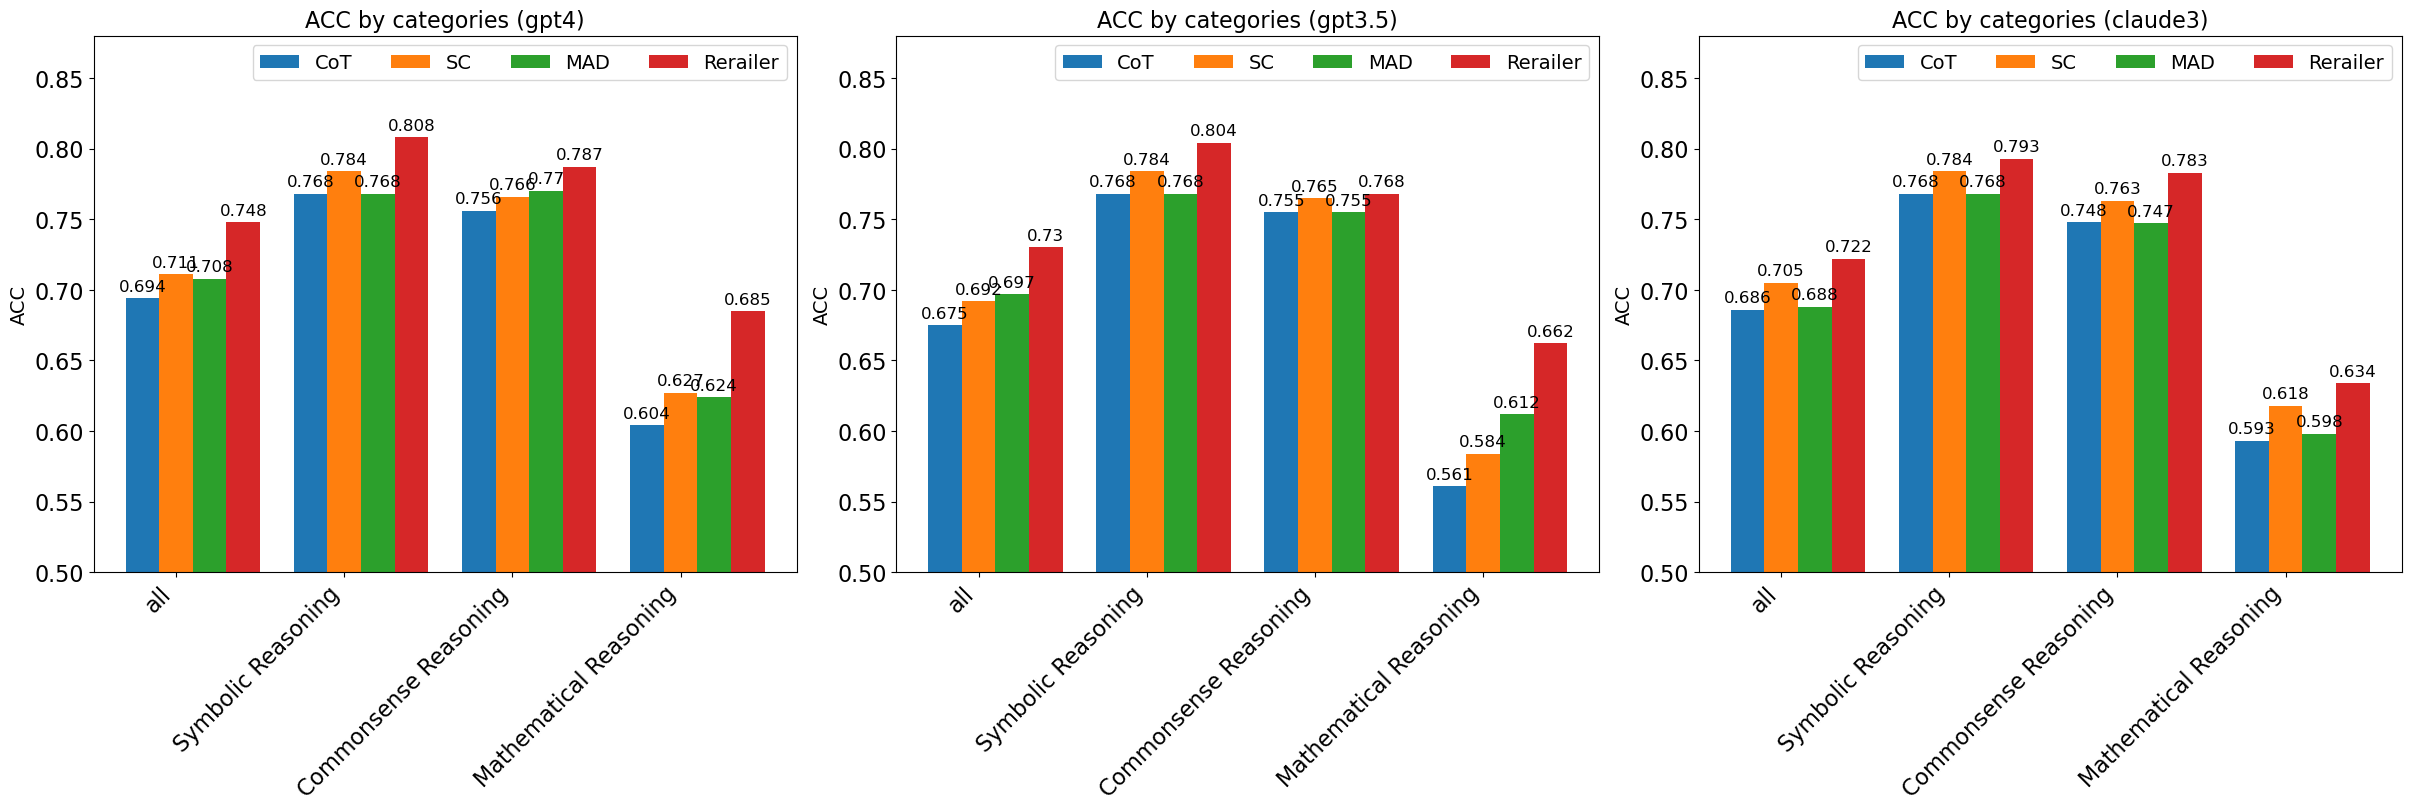

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot(df, model, chunk_size=4, ax=None, fontsize=12):
    categories = tuple(df.Category.tolist())
    result = {'CoT': tuple(df.CoT.tolist()),
              'SC': tuple(df.SC.tolist()),
              'MAD': tuple(df.MAD.tolist()),
              'Rerailer': tuple(df.Rerailer.tolist()),
              # Add more columns here if needed
              }

    num_categories = len(categories)
    num_chunks = (num_categories + chunk_size - 1) // chunk_size  # Calculate number of chunks
    width = 0.20  # the width of the bars

    for chunk in range(num_chunks):
        start_idx = chunk * chunk_size
        end_idx = min(start_idx + chunk_size, num_categories)

        chunk_categories = categories[start_idx:end_idx]
        chunk_result = {k: v[start_idx:end_idx] for k, v in result.items()}
        x = np.arange(len(chunk_categories))  # the label locations

        if ax is None:
            plt.figure(figsize=(16, 8))
            fig, ax = plt.subplots(layout='constrained')

        multiplier = 0
        for attribute, measurement in chunk_result.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3, fontsize=fontsize - 2)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('ACC', fontsize=fontsize)
        ax.set_title(f'ACC by categories ({model})', fontsize=fontsize+2)
        ax.set_xticks(x + width)
        ax.set_xticklabels(chunk_categories, rotation=45, ha='right', fontsize=fontsize)  # Rotate x-axis labels
        ax.legend(loc='best', ncols=4, fontsize=fontsize)
        ax.set_ylim(0.5, 0.88)
        ax.tick_params(axis='both', which='major', labelsize=fontsize+2)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 8), constrained_layout=True)

# Plot the bar plots with increased font size
get_plot(df_result_4, 'gpt4', ax=axs[0], fontsize=14)
get_plot(df_result_3, 'gpt3.5', ax=axs[1], fontsize=14)
get_plot(df_result_claude, 'claude3', ax=axs[2], fontsize=14)

plt.show()


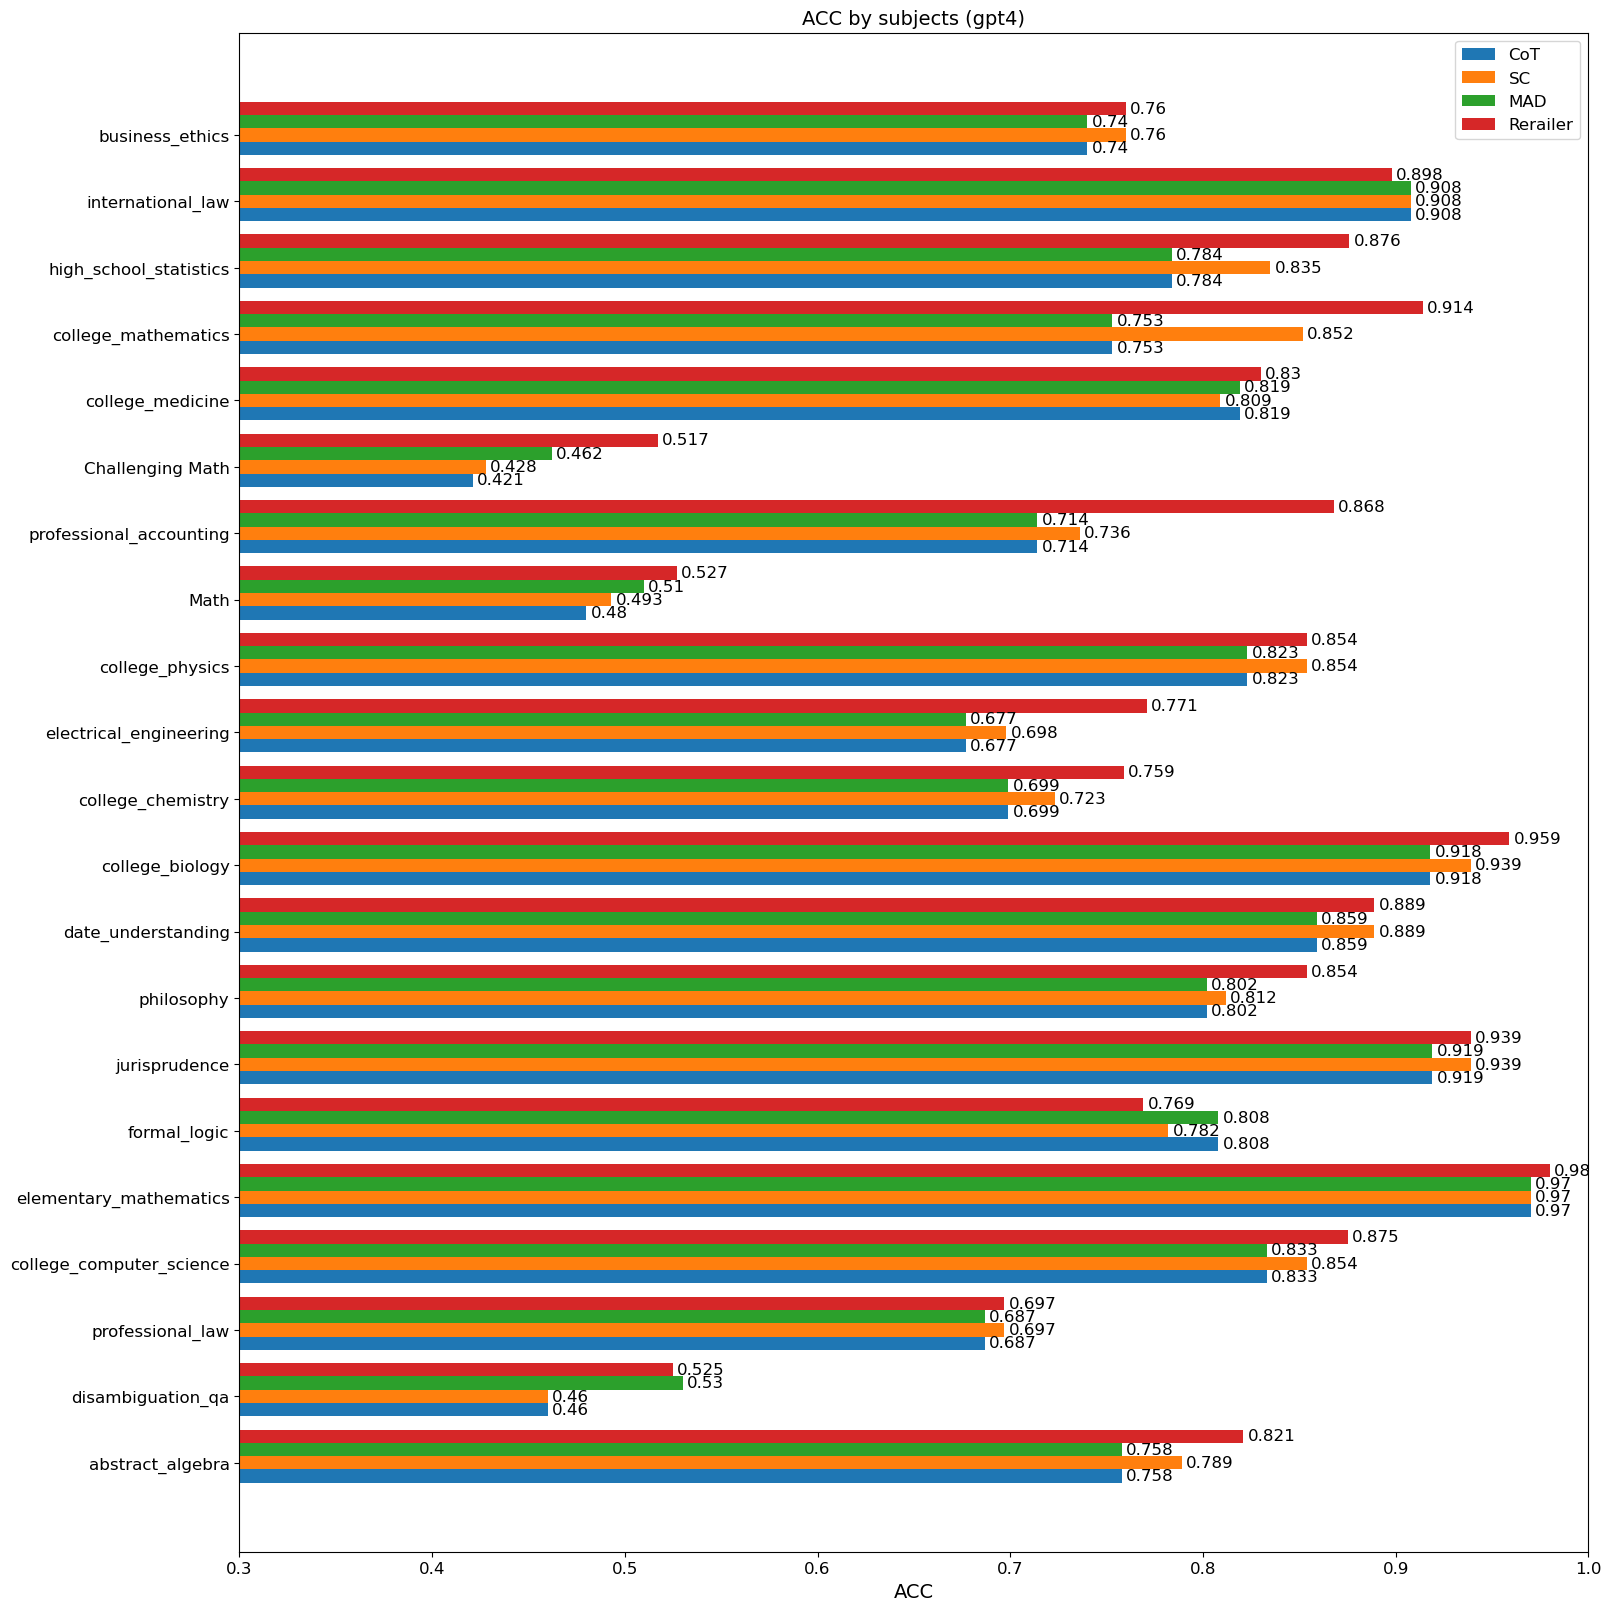

In [12]:
import matplotlib.pyplot as plt
import numpy as np
results_li = []
for cate in set(df_3.Category.tolist()):
    df_temp = df_3[df_3['Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-3.5-turbo'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_3 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]


results_li = []
for cate in set(df_claude.Category.tolist()):
    df_temp = df_claude[df_claude['Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'claude-3-sonnet'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_claude = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]


results_li = []
for cate in set(df_4.Category.tolist()):
    df_temp = df_4[df_4['Category']==cate]
    result = compute_results(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_result_4 = pd.concat(results_li,ignore_index=True)[['Category','Model','CoT','SC','MAD','Rerailer']]

def get_horizontal_plot(df, model, ax=None, fontsize=12):
    categories = tuple(df.Category.tolist())
    result = {'CoT': tuple(df.CoT.tolist()),
              'SC': tuple(df.SC.tolist()),
              'MAD': tuple(df.MAD.tolist()),
              'Rerailer': tuple(df.Rerailer.tolist()),
              # Add more columns here if needed
              }

    num_categories = len(categories)
    height = 0.20  # the height of the bars

    y = np.arange(num_categories)  # the label locations

    if ax is None:
        plt.figure(figsize=(16, 8))
        fig, ax = plt.subplots(layout='constrained')

    multiplier = 0
    for attribute, measurement in result.items():
        offset = height * multiplier
        rects = ax.barh(y + offset, measurement, height, label=attribute)
        ax.bar_label(rects, padding=3, fontsize=fontsize - 2)
        multiplier += 1

    # Add some text for labels, title and custom y-axis tick labels, etc.
    ax.set_xlabel('ACC', fontsize=fontsize)
    ax.set_title(f'ACC by subjects ({model})', fontsize=fontsize)
    ax.set_yticks(y + height)
    ax.set_yticklabels(categories, rotation=0, ha='right', fontsize=fontsize - 2)  # Rotate y-axis labels
    ax.legend(loc='best', ncols=1, fontsize=fontsize - 2)
    ax.set_xlim(0.3, 1)
    ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(16, 16), constrained_layout=True)

# Plot the horizontal bar plot with increased font size for GPT-4
get_horizontal_plot(df_result_4, 'gpt4', ax=ax, fontsize=14)

plt.show()

In [13]:
correctness = []
sc_correctness = []
mad_correctness = []
rerailer_correctness = []
for row_index in range(len(df_4)):
    row = df_4.iloc[row_index]
    correct_ans = row['Correct_Answer'].lower()
    output_answer = row['Cot_random_answer'].lower()
    sc_answer = row['Smv_Answer'].lower()
    # judge_answer = row['Output_Answer'].lower()
    mad_answer = modify_float(row['MAD_Answer']).lower()
    rerailer_ans = row['Corrected COT Answer'].lower()
    if correct_ans == output_answer[0]:
        correctness.append(1)
    else:
        correctness.append(0)
    if correct_ans == sc_answer[0]:
        sc_correctness.append(1)
    else:
        sc_correctness.append(0)
    if correct_ans == mad_answer[0]:
        mad_correctness.append(1)
    else:
        mad_correctness.append(0)
    if correct_ans == rerailer_ans[0]:
        rerailer_correctness.append(1)
    else:
        rerailer_correctness.append(0)

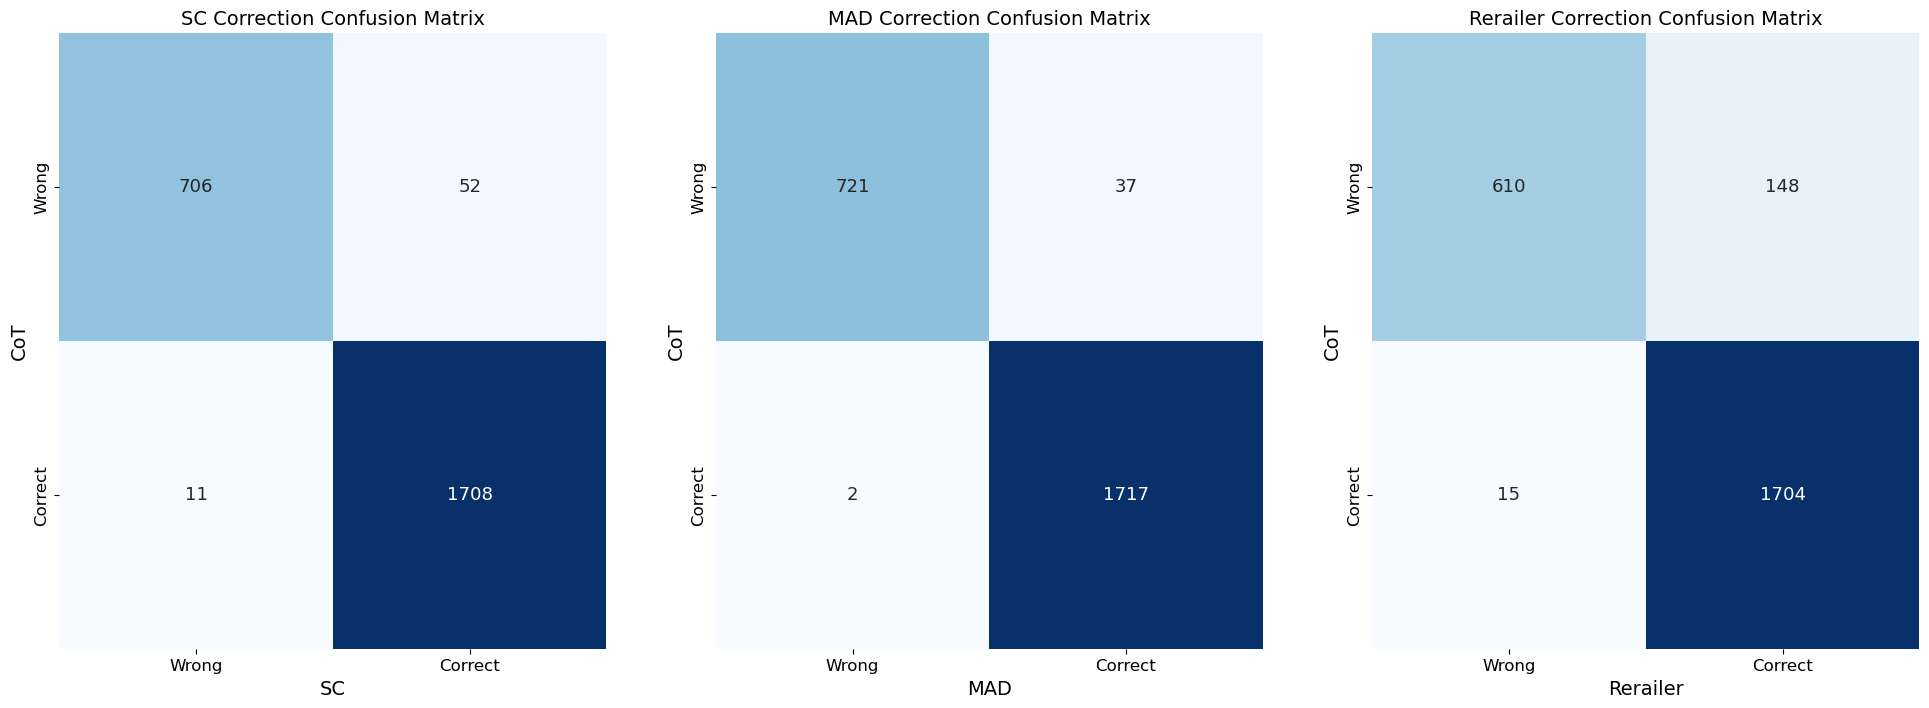

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(ax, cm, title, xlabel, ylabel, fontsize=12):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax, 
                xticklabels=['Wrong', 'Correct'], yticklabels=['Wrong', 'Correct'],
                annot_kws={"size": fontsize - 1})
    ax.set_xlabel(xlabel, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    ax.tick_params(axis='both', which='major', labelsize=fontsize - 2)

# Sample true labels and predicted labels
cot = correctness
sc_correctness = sc_correctness
mad_correctness = mad_correctness
rerailer_correctness = rerailer_correctness

# Compute the confusion matrices
cm_sc = confusion_matrix(cot, sc_correctness)
cm_mad = confusion_matrix(cot, mad_correctness)
cm_rerailer = confusion_matrix(cot, rerailer_correctness)

# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Plot the confusion matrices with increased font size
plot_confusion_matrix(axs[0], cm_sc, 'SC Correction Confusion Matrix', 'SC', 'CoT', fontsize=14)
plot_confusion_matrix(axs[1], cm_mad, 'MAD Correction Confusion Matrix', 'MAD', 'CoT', fontsize=14)
plot_confusion_matrix(axs[2], cm_rerailer, 'Rerailer Correction Confusion Matrix', 'Rerailer', 'CoT', fontsize=14)

plt.show()


# cost analysis

In [15]:
from openai import OpenAI
client = OpenAI(api_key=api_key)

completion = client.chat.completions.create(
  model="gpt-4",
  messages=[
    {"role": "system", "content": "You are an expert in college math assistant, skilled in explaining complex programming concepts with creative flair. Help me answer question step by step. clearly state your reasoning path and final answer"},
    {"role": "user", "content": "Let y = f(x) be a solution of the differential equation x dy + (y - xe^x) dx = 0 such that y = 0 when x = 1. What is the value of f(2)? The options are: A) 1/(2e), B) 1/e, C) e^2/2, D) 2e"}
  ]
)

print(completion.choices[0].message)


NameError: name 'api_key' is not defined

In [16]:
num_of_samples = len(df_4)
unit_time = 22*num_of_samples
unit_cost = 0.06*num_of_samples
# SC
SC_call = 40

# MAD
num_of_agents = 2
rounds = 3
MAD_call = num_of_agents*rounds
# Rerailer
cot_call = 3
judge_call = 1
root_checker_call = 10
debate_call = 2
check_times = 3
final_cot_call = 1
consistent_inconsistent_ratio = len(df_4[df_4.Consistency == False])/len(df_4)

derailment_call = cot_call
rerailment_call = (judge_call+root_checker_call+(debate_call+1)*check_times + final_cot_call)
Rerailer_call = derailment_call + rerailment_call*consistent_inconsistent_ratio



print('COT',1*unit_cost,1*unit_time/3600)
print('SC',SC_call*unit_cost,SC_call*unit_time/3600)
print('MAD', MAD_call*unit_cost,MAD_call*unit_time/3600)
print('Rerailer',Rerailer_call*unit_cost,Rerailer_call*unit_time/3600)
print('Rerailer - derail only',derailment_call*unit_cost,derailment_call*unit_time/3600)
print('Rerailer - rerail only',rerailment_call*unit_cost,rerailment_call*unit_time/3600)

COT 148.62 15.137222222222222
SC 5944.8 605.4888888888889
MAD 891.72 90.82333333333334
Rerailer 851.58 86.735
Rerailer - derail only 445.86 45.41166666666667
Rerailer - rerail only 3121.02 317.88166666666666


# Ablation Study

In [67]:
def compute_results_ab(df):
    rerailer_correctness = 0
    for row_index in range(len(df)):
        row = df.iloc[row_index]
        correct_ans = row['Correct Answer'].lower()
        rerailer_ans = row['Corrected COT Answer'].lower()

        if correct_ans == rerailer_ans[0]:
            rerailer_correctness += 1
        else:
            rerailer_correctness += 0
    
    result_dict={
        'Rerailer':round(rerailer_correctness/len(df),3)
    }
    return result_dict

In [103]:
df_derail_only = pd.read_csv('../result/ablation_study/aba_df_derail_only.csv')
df_derail_only

,Category,Question,raw_cot,corrected_cot,Correct Answer,Corrected COT Answer,Big_Category
0,professional_accounting,Which of the following items is not subject to...,Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,d,d,Advanced Math and Science
1,professional_accounting,Pine Co. purchased land for $450000 as a facto...,Step 1: Understand that the cost to be capital...,Step 1: Understand that the cost to be capital...,c,c,Advanced Math and Science
2,professional_accounting,Spark Co. buys cordless phones for $125 each a...,Step 1: Calculate the profit per unit by subtr...,Step 1: Calculate the profit per unit by subtr...,d,the thought process contains errors in formula...,Advanced Math and Science
3,professional_accounting,The standard deviations of Stocks A and B are ...,Step 1: Understand that the standard deviation...,Step 1: Understand that the standard deviation...,a,none of the options match the calculated value...,Advanced Math and Science
4,professional_accounting,A shoe retailer allows customers to return sho...,Step 1: Understand the problem. The company ne...,Step 1: Understand the problem. The company ne...,b,b,Advanced Math and Science
...,...,...,...,...,...,...,...
2472,disambiguation_qa,"In the following sentences, explain the antece...",B,NaN,B,B,Commonsense Reasoning
2473,disambiguation_qa,"In the following sentences, explain the antece...",B,NaN,B,B,Commonsense Reasoning
2474,disambiguation_qa,"In the following sentences, explain the antece...",C,NaN,C,C,Commonsense Reasoning
2475,disambiguation_qa,"In the following sentences, explain the antece...",C,NaN,A,C,Commonsense Reasoning


In [104]:
category_mapping = {
    'Mathematical Reasoning': [
        'Math', 
        'elementary_mathematics', 
        'high_school_statistics', 
        'abstract_algebra', 
        'Challenging Math', 
        'college_mathematics',
        'professional_accounting'
    ],
    'Symbolic Reasoning': [
        'formal_logic', 
        'college_computer_science', 
        'college_physics', 
        'electrical_engineering', 
        'college_chemistry'
    ],
    'Commonsense Reasoning': [
        'disambiguation_qa', 
        'jurisprudence', 
        'date_understanding', 
        'professional_law', 
        'international_law', 
        'philosophy', 
        'business_ethics', 
        'college_biology', 
        'college_medicine'
    ]
}

reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_derail_only['Big_Category'] = df_derail_only['Category'].map(reverse_mapping)
results_li = []
result = compute_results_ab(df_derail_only)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_derail_only.Big_Category.tolist()):
    print(cate)
    df_temp = df_derail_only[df_derail_only['Big_Category']==cate]
    result = compute_results_ab(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_derail_only_result = pd.concat(results_li,ignore_index=True)[['Category','Model','Rerailer']]
df_derail_only_result

Commonsense Reasoning
Symbolic Reasoning
Mathematical Reasoning


,Category,Model,Rerailer
0,all,gpt-4,0.725
1,Commonsense Reasoning,gpt-4,0.769
2,Symbolic Reasoning,gpt-4,0.793
3,Mathematical Reasoning,gpt-4,0.656


In [90]:
df_rerail_only = pd.read_csv('../result/ablation_study/aba_df_rerail_only.csv')
df_rerail_only

,Category,Question,raw_cot,corrected_cot,Correct Answer,Corrected COT Answer,Big_Category
0,professional_accounting,Which of the following items is not subject to...,Step 1: Understand what intraperiod tax alloca...,Step 1: Understand what intraperiod tax alloca...,d,c,Advanced Math and Science
1,professional_accounting,Pine Co. purchased land for $450000 as a facto...,step 1: Understand that the cost of the comple...,Step 1: Understand that the cost of the comple...,c,a,Advanced Math and Science
2,professional_accounting,Spark Co. buys cordless phones for $125 each a...,"step 1: Calculate the desired profit margin, w...","Step 1: Calculate the desired profit margin, w...",d,the calculation in step 12 requires further ma...,Advanced Math and Science
3,professional_accounting,The standard deviations of Stocks A and B are ...,Step 1: Understand that the standard deviation...,Step 1: Understand that the standard deviation...,a,d,Advanced Math and Science
4,professional_accounting,A shoe retailer allows customers to return sho...,Step 1: Understand the problem. The company ne...,Step 1: Understand the problem. The company ne...,b,b,Advanced Math and Science
...,...,...,...,...,...,...,...
2472,disambiguation_qa,"In the following sentences, explain the antece...",B,NaN,B,B,Commonsense Reasoning
2473,disambiguation_qa,"In the following sentences, explain the antece...",B,NaN,B,B,Commonsense Reasoning
2474,disambiguation_qa,"In the following sentences, explain the antece...",C,NaN,C,C,Commonsense Reasoning
2475,disambiguation_qa,"In the following sentences, explain the antece...",C,NaN,A,C,Commonsense Reasoning


In [91]:
category_mapping = {
    'Mathematical Reasoning': [
        'Math', 
        'elementary_mathematics', 
        'high_school_statistics', 
        'abstract_algebra', 
        'Challenging Math', 
        'college_mathematics',
        'professional_accounting'
    ],
    'Symbolic Reasoning': [
        'formal_logic', 
        'college_computer_science', 
        'college_physics', 
        'electrical_engineering', 
        'college_chemistry'
    ],
    'Commonsense Reasoning': [
        'disambiguation_qa', 
        'jurisprudence', 
        'date_understanding', 
        'professional_law', 
        'international_law', 
        'philosophy', 
        'business_ethics', 
        'college_biology', 
        'college_medicine'
    ]
}

reverse_mapping = {}
for new_cat, old_cats in category_mapping.items():
    for old_cat in old_cats:
        reverse_mapping[old_cat] = new_cat

# Map the old categories to new categories
df_rerail_only['Big_Category'] = df_rerail_only['Category'].map(reverse_mapping)
results_li = []
result = compute_results_ab(df_rerail_only)
result['Model'] = 'gpt-4'
result['Category'] = 'all'
results_li.append(pd.DataFrame(result, index=[0]))
for cate in set(df_rerail_only.Big_Category.tolist()):
    print(cate)
    df_temp = df_rerail_only[df_rerail_only['Big_Category']==cate]
    result = compute_results_ab(df_temp)
    result['Model'] = 'gpt-4'
    result['Category'] = cate
    results_li.append(pd.DataFrame(result, index=[0]))
df_rerail_only_result = pd.concat(results_li,ignore_index=True)[['Category','Model','Rerailer']]
df_rerail_only_result

Commonsense Reasoning
Symbolic Reasoning
Mathematical Reasoning


,Category,Model,Rerailer
0,all,gpt-4,0.719
1,Commonsense Reasoning,gpt-4,0.773
2,Symbolic Reasoning,gpt-4,0.782
3,Mathematical Reasoning,gpt-4,0.643
